___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
Note: Capstone Project; Part of Python for Data Science and Machine Learning Bootcamp Course on Udemy. Just for learning purpose.

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We use the pickle file provided. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [3]:
df = pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [4]:
df.columns.levels

FrozenList([['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']])

**Check the head of the bank_stocks dataframe.**

In [5]:
bank_stocks = df.copy()
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [6]:
bank_stocks.shape

(2517, 30)

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

**What is the max Close price for each bank's stock throughout the time period?**

In [6]:
# Selecting a column inside another column: Multi-level Columns
bank_stocks.xs(('Close'), axis=1, level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [7]:
bank_stocks.xs(('BAC','Close'), axis=1)

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
              ...  
2015-12-24    17.27
2015-12-28    17.13
2015-12-29    17.28
2015-12-30    17.05
2015-12-31    16.83
Name: (BAC, Close), Length: 2517, dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$
p_t - closing price of today, p_{t-1} - closing price of yesterday 

In [8]:
returns =pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [9]:
print(bank_stocks.columns)

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])


In [10]:
for bank,close in bank_stocks.columns:
    if close == 'Close':
        returns[f'{bank} Return'] = bank_stocks.xs((f'{bank}','Close'),axis=1).pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

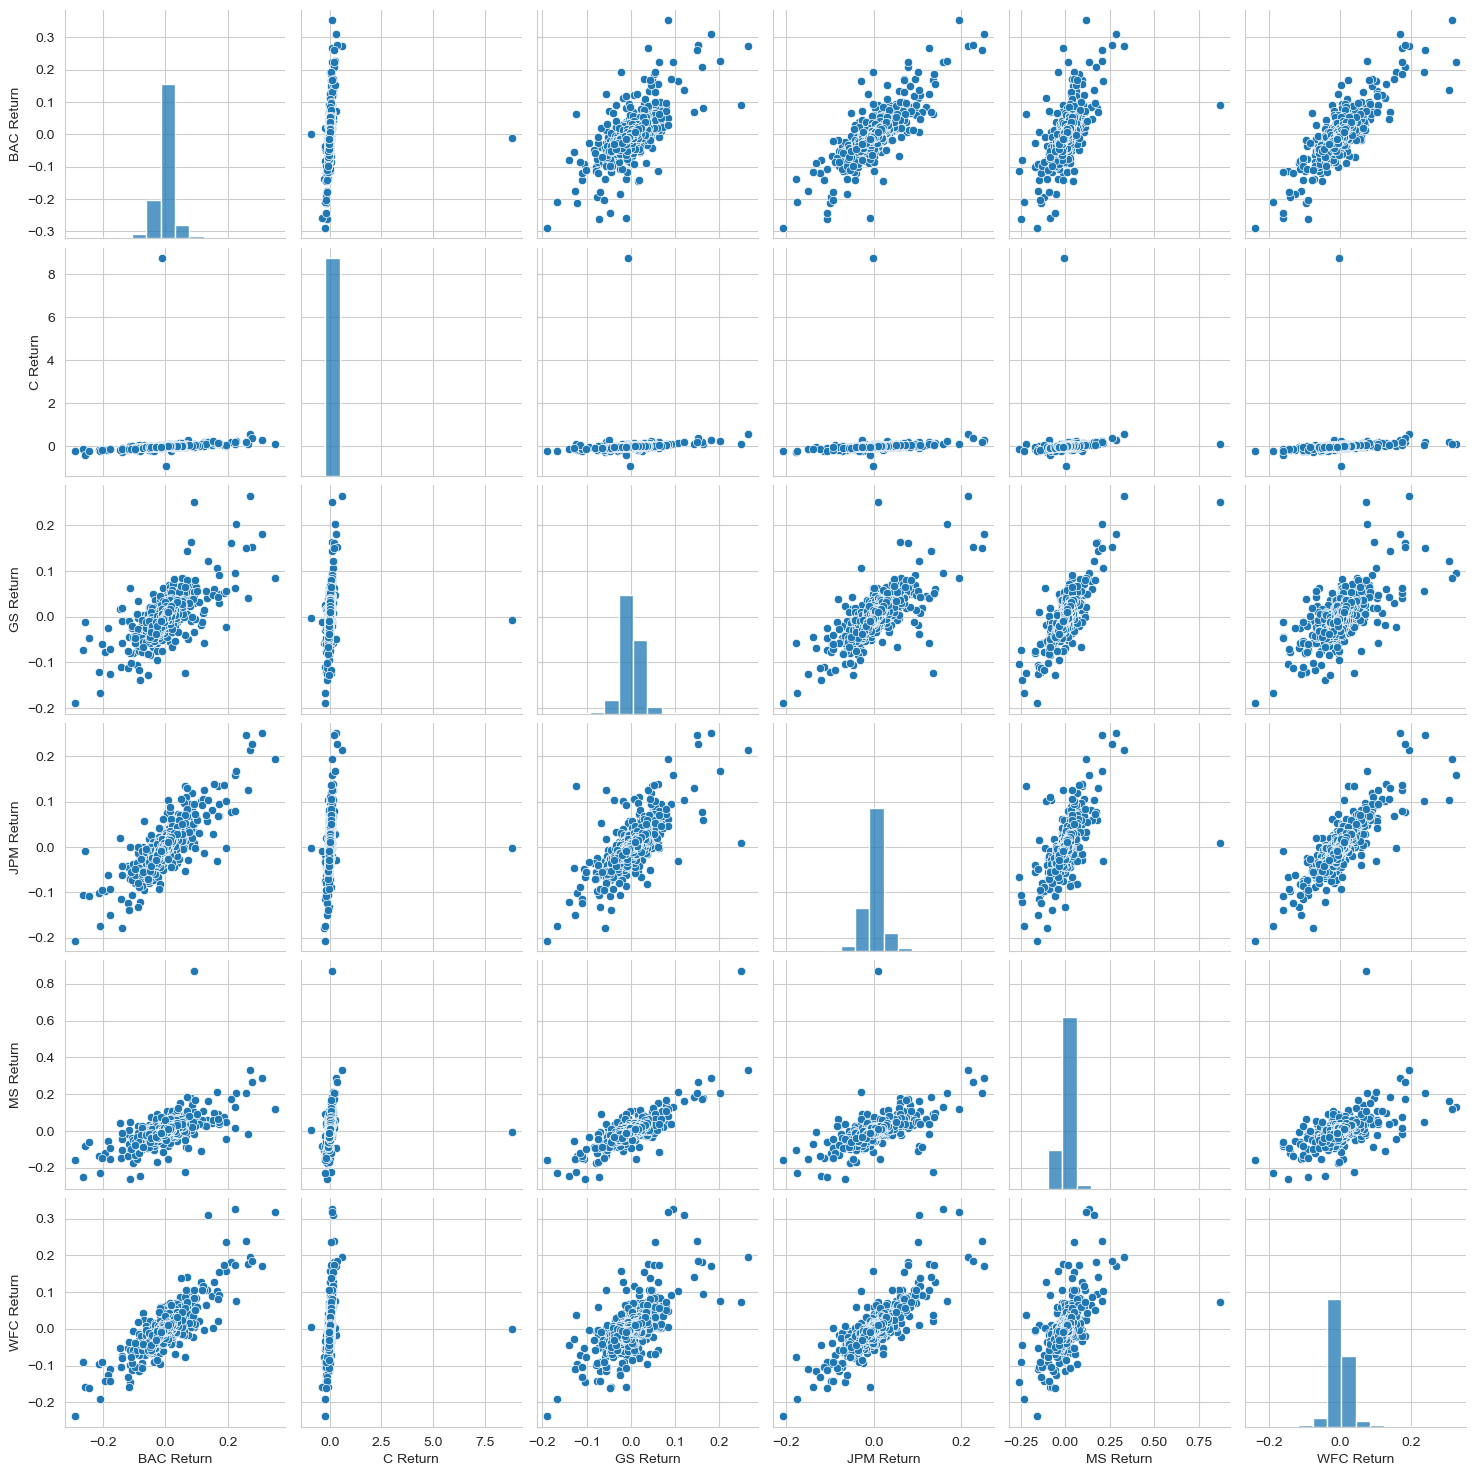

In [11]:
sns.set_style("whitegrid")
sns.pairplot(returns,diag_kws={'bins':14})

**Citigroup behavior....**

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [45]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [53]:
# Worst single day return
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [55]:
# Best single day return
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

Paid a huge fine 

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [12]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

##### From the above output Citigroup seems to be the riskiest because of high standard deviation

In [13]:
returns[returns.index.year == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### In 2015, Morgan Stanley was the riskiest because of high standard deviation

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

C:\Users\deepm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

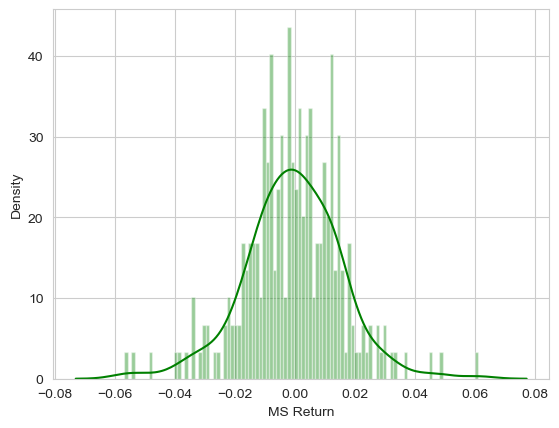

In [14]:
sns.distplot(returns['MS Return'][returns.index.year==2015],bins=100,color= 'green')

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

C:\Users\deepm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

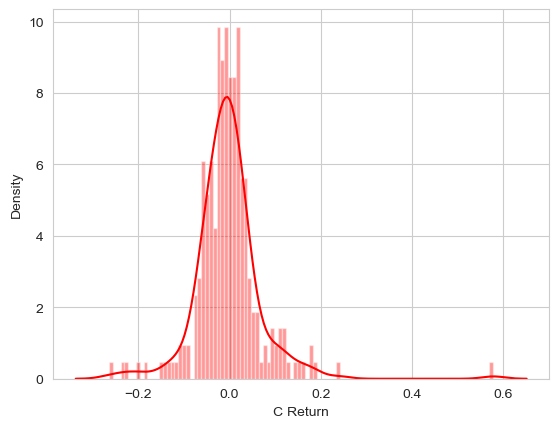

In [15]:
sns.distplot(returns['C Return'][returns.index.year==2008],bins=100,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [16]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
from plotly.offline import init_notebook_mode,iplot,download_plotlyjs
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [17]:
cls_all_banks = bank_stocks.xs(('Close'),axis=1, level=1)
cls_all_banks.iplot(xTitle = 'Date')


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Text(0.5, 1.0, 'BAC 2008 Close & 30 Day rolling average')

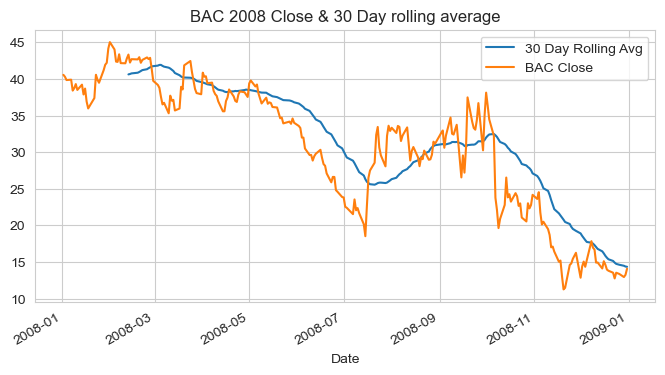

In [18]:
plt.figure(figsize=(8,4,))
bank_stocks['BAC']['Close'][bank_stocks.index.year == 2008].rolling(window=30).mean().plot(label='30 Day Rolling Avg')
bank_stocks['BAC']['Close'][bank_stocks.index.year == 2008].plot(label = 'BAC Close')
plt.legend()
plt.title("BAC 2008 Close & 30 Day rolling average")

**Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

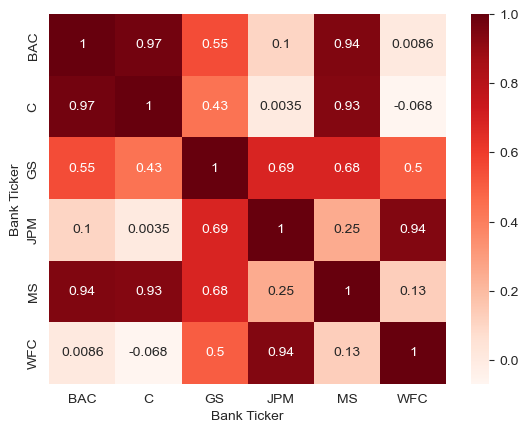

In [19]:
correlation =bank_stocks.xs(('Close'),axis=1,level=1).corr()
sns.heatmap(correlation,annot = True,cmap='Reds')


Use seaborn's clustermap to cluster the correlations together:**

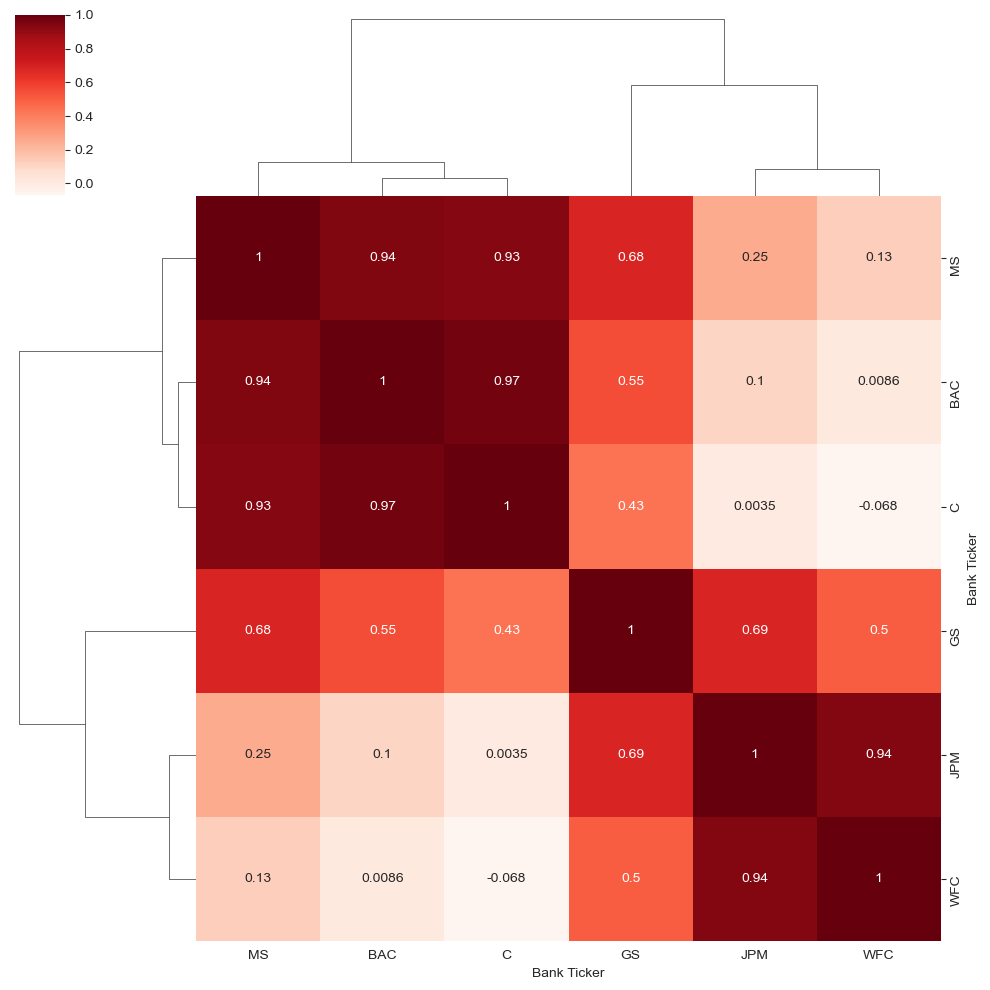

In [20]:
sns.clustermap(correlation,annot = True,cmap = 'Reds')

In [21]:
close_corr = bank_stocks.xs(('Close'),axis=1,level=1).corr()
close_corr.iplot(kind='heatmap',colorscale='Reds')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [22]:
BAC = bank_stocks['BAC']
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [178]:
MS= bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01']
MS.ta_plot(study = 'sma',periods=[13,21,55],title = "Simple Moving Average")

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [181]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',title= 'Bollinger Bank Plot for BAC') 

# Great Job!
